In [112]:
import pandas as pd

pumpkin = pd.read_csv('../data/US-pumpkins.csv')

# We only keep bushel as unit of measure in order to compute price per bushel
pumpkin = pumpkin[pumpkin['Package'].str.contains('bushel',case = True, regex = True)]
pumpkin.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [113]:
pumpkin.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [114]:
# Create month variable
new_pumpkin = pumpkin.copy()
new_pumpkin['Month'] = pd.DatetimeIndex(new_pumpkin['Date']).month

In [115]:
new_pumpkin['Month'].count()

415

In [116]:
cols = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
new_pumpkin = new_pumpkin[cols]

In [117]:
new_pumpkin['Price'] = (new_pumpkin['Low Price'] + new_pumpkin['High Price']) / 2

In [118]:
new_pumpkin.head()

,Package,Month,Low Price,High Price,Date,Price
70,1 1/9 bushel cartons,9,15.0,15.0,9/24/16,15.0
71,1 1/9 bushel cartons,9,18.0,18.0,9/24/16,18.0
72,1 1/9 bushel cartons,10,18.0,18.0,10/1/16,18.0
73,1 1/9 bushel cartons,10,17.0,17.0,10/1/16,17.0
74,1 1/9 bushel cartons,10,15.0,15.0,10/8/16,15.0


In [119]:
new_pumpkin.loc[new_pumpkin['Package'].str.contains('1 1/9'), 'Price'] = new_pumpkin['Price']/(1 + 1/9)
new_pumpkin.loc[new_pumpkin['Package'].str.contains('1/2'), 'Price'] = new_pumpkin['Price']/(1/2)

In [120]:
new_pumpkin.sort_values(by = 'Price', ascending = True).head()

,Package,Month,Low Price,High Price,Date,Price
1258,1 1/9 bushel cartons,10,12.0,12.0,10/29/16,10.8
1259,1 1/9 bushel cartons,11,12.0,12.0,11/5/16,10.8
1257,1 1/9 bushel cartons,10,12.0,12.0,10/22/16,10.8
1627,1 1/9 bushel cartons,10,12.0,12.0,10/29/16,10.8
1626,1 1/9 bushel cartons,10,12.0,12.0,10/22/16,10.8


# Data visualization

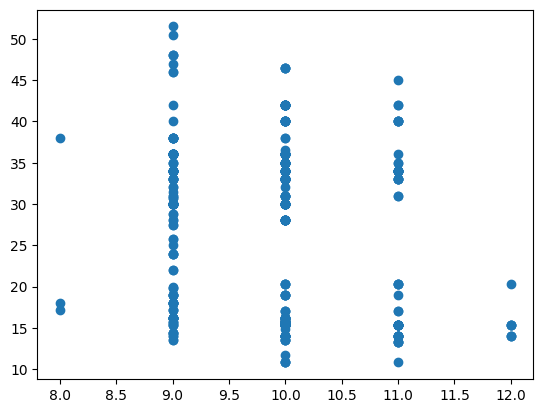

In [121]:
import matplotlib.pyplot as plt

plt.scatter(new_pumpkin.Month, new_pumpkin.Price)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

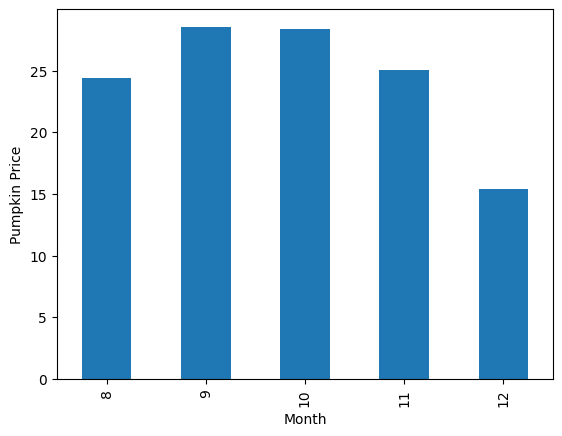

In [123]:
new_pumpkin.groupby(['Month'])['Price'].mean().plot(kind = 'bar')
plt.ylabel('Pumpkin Price')

## Other plots

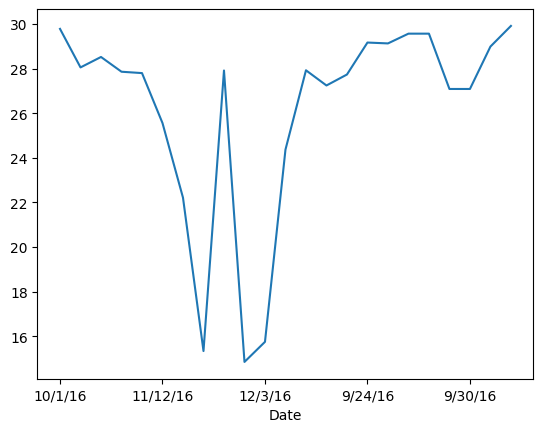

In [125]:
new_pumpkin.groupby(['Date'])['Price'].mean().plot(kind='line')
plt.show()